# Retention Modeling at Scholastic Travel Company (A)

La problematica requiere de crear un modelo de retención de clientes efectivo que pueda predecir cuáles clientes es probable que reserven nuevamente con STC en el próximo año escolar.

Especificamente saber cuáles clientes reservarán con Scholastic Travel Company (STC) en el año escolar 2013-14 (otoño 2013 a primavera 2014), basándose en los datos disponibles hasta la primavera de 2013.

Esto significa que, para entrenar el modelo, se usará los datos del año escolar 2012-13, que muestran si se ha mantenido o no un cierto grupo, y se intentará predecir en base a la información del perfil del cliente hasta el final del año escolar 2011-12.

Este modelo será utilizado para informar y optimizar la estrategia de marketing de la compañía.



## Importar (libreria & Base de datos)

In [580]:
#Importamos todas las librerias que nos pueden ser de utilidad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
!pip install pandas openpyxl

In [581]:
url81 = 'https://drive.google.com/u/0/uc?id=1JiLgQkf1E9XAQGrn5hAJIb1Qa2Mt7fw_&export=download'
data81 = pd.read_excel(url81, sheet_name='Exhibit 1 -- Data', engine='openpyxl')
data81

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,...,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0
2388,2389,HD,8.0,8.0,WA,0.0,6.0,A,2011-06-30,2011-07-05,...,Middle,Middle,Middle->Middle,H,1.0,0.027711,0.884615,3.0,L,1.0
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analisis Exploratorio

### Visualización de los datos

#### Identificar columnas

In [582]:
columnas = data81.columns
print(columnas)

Index(['ID', 'Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Tuition', 'FRP.Active',
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Initial.System.Date',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', '

#### Total de variables

In [583]:
data81.shape

(2392, 56)

#### Identificar variables numericas y categoricas

In [584]:
print(data81.dtypes)

ID                                        object
Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                           float64
Days                                     float64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                  float64
FRP.Active                               float64
FRP.Cancelled                            float64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                            float64
Total.Discount.Pax                       float64
Initial.System.Date 

#### Composicion de los datos

In [585]:
data81.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2390 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

#### Identificar los valores perdidos

In [586]:
data81.isnull().sum()

ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

<Axes: >

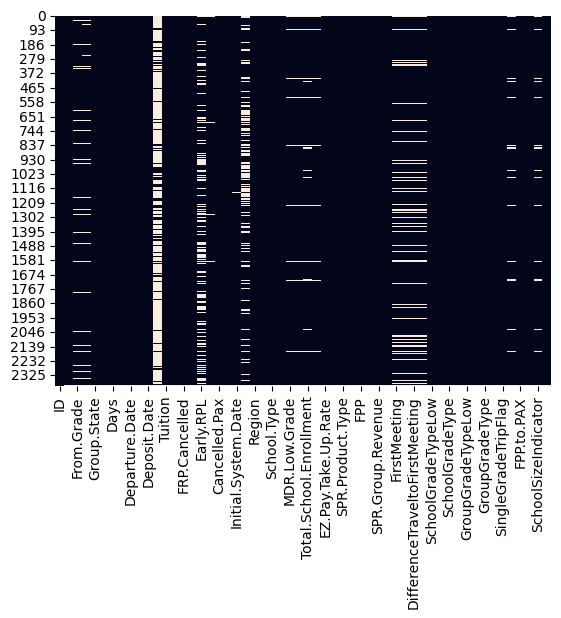

In [587]:
sns.heatmap(data81.isnull(), cbar=False)

#### Distribución de variables

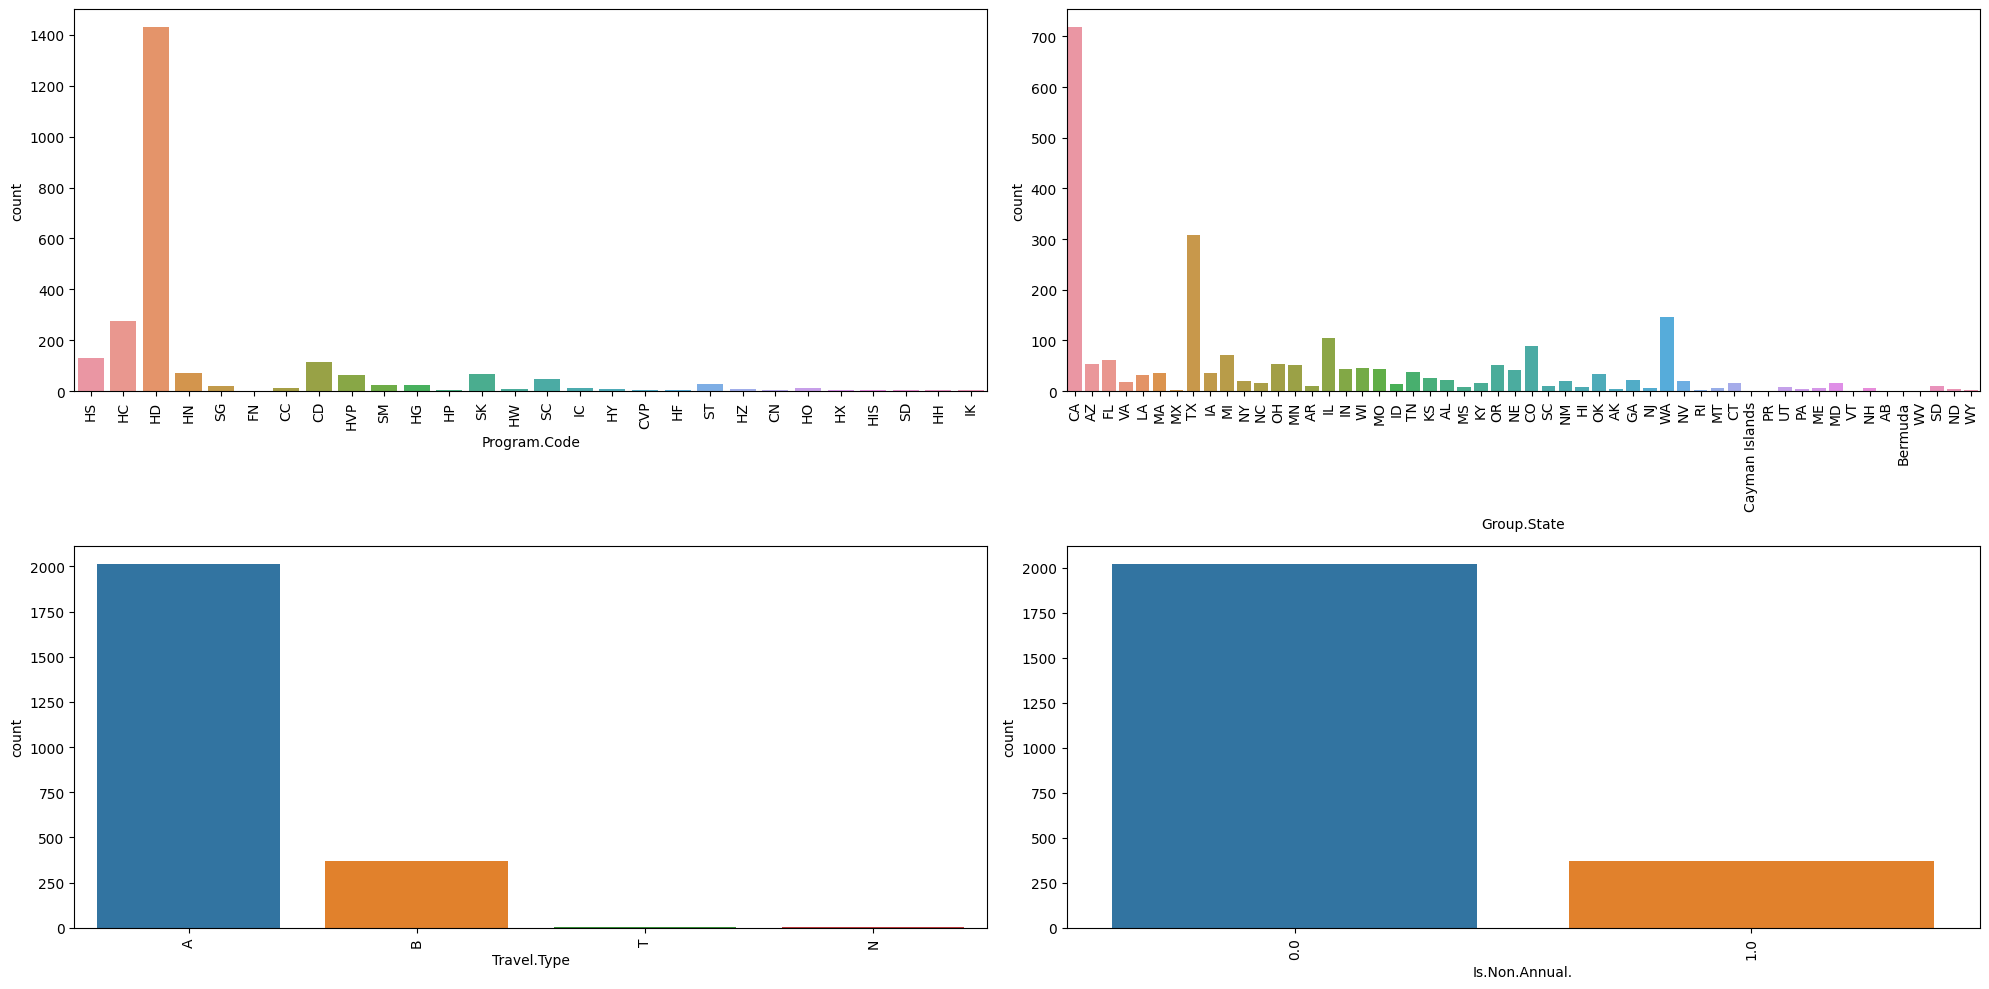

In [588]:
categorical_vars = ['Program.Code', 'Group.State', 'Travel.Type', 'Is.Non.Annual.']
numerical_vars = ['From.Grade', 'To.Grade', 'Days']

data_categorical = data81[categorical_vars]
data_numerical = data81[numerical_vars]

# Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Crear un countplot para cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data_categorical, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

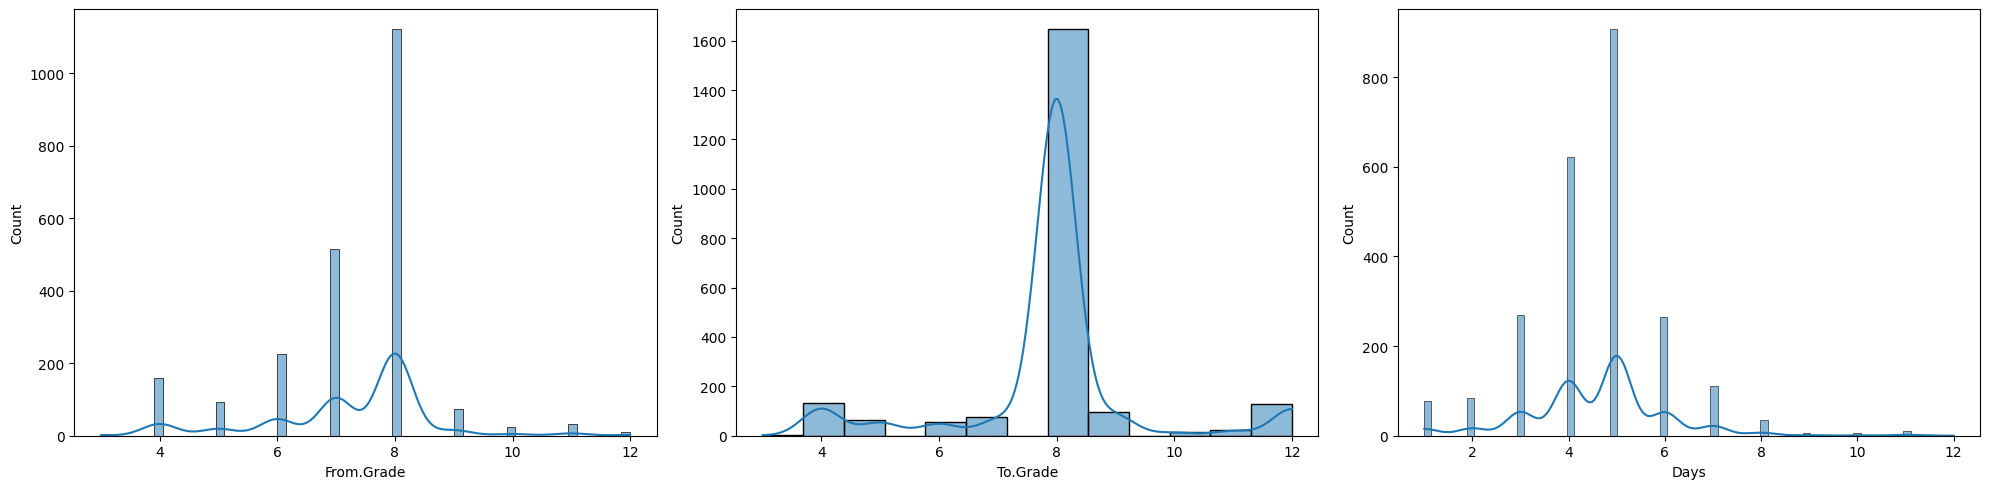

In [589]:
# Crear figuras con subplots para histogramas y diagramas de cajas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

# Crear histogramas para cada variable numérica
for i, var in enumerate(numerical_vars):
    sns.histplot(data=data_numerical, x=var, ax=axs[i], kde=True)

fig.tight_layout()
plt.show()

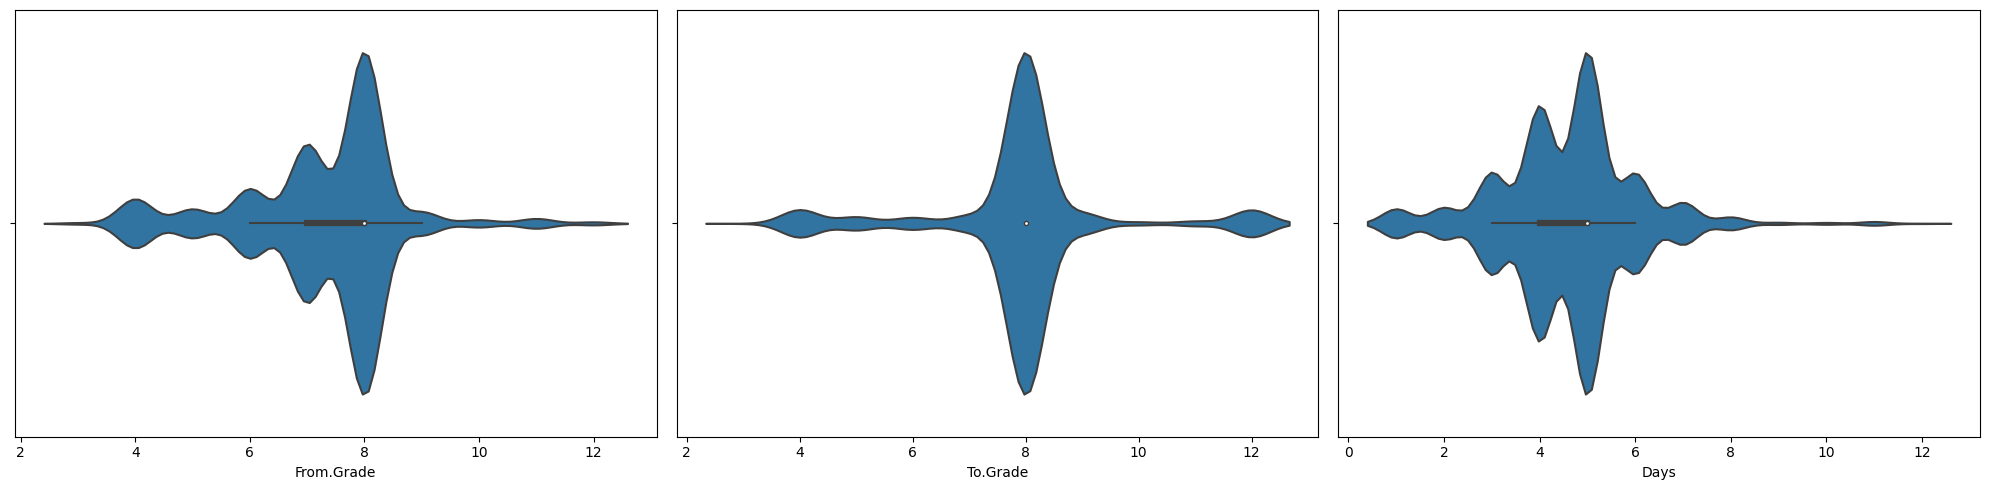

In [590]:
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

for i, var in enumerate(numerical_vars):
    sns.violinplot(x=var, data=data_numerical, ax=axs[i])

fig.tight_layout()
plt.show()

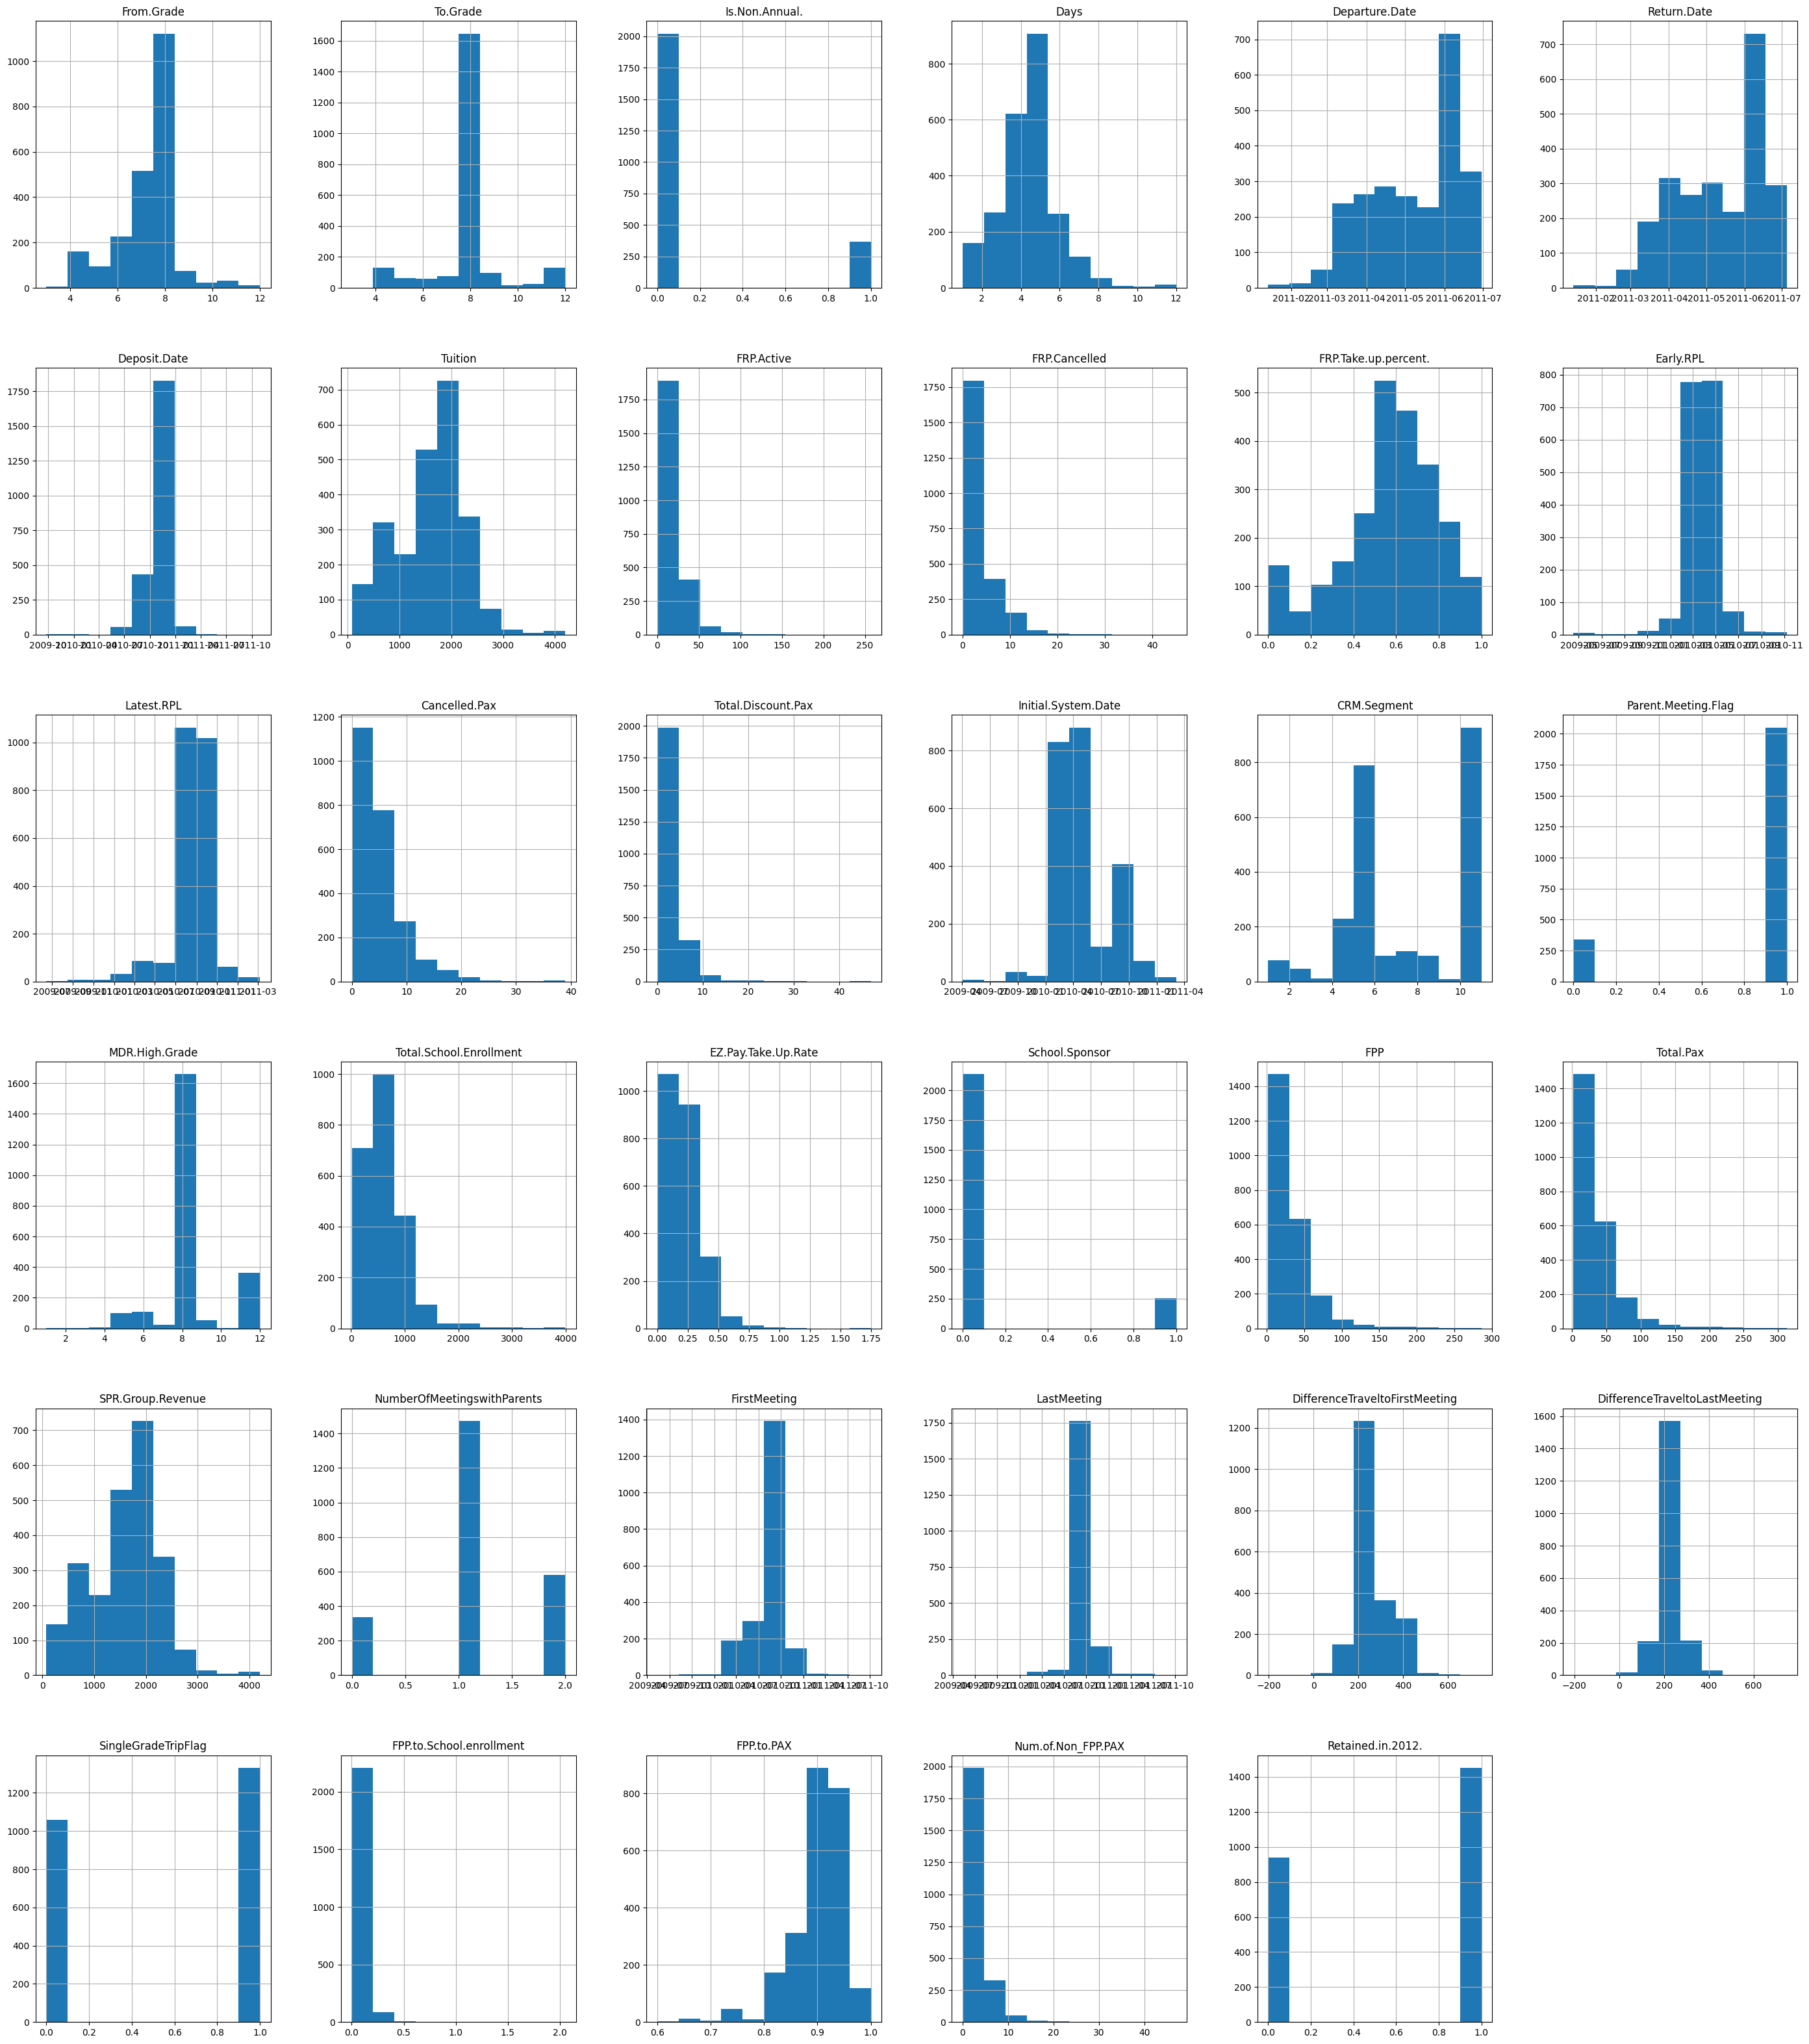

In [591]:
data81.hist(figsize=(35, 40))
plt.show()

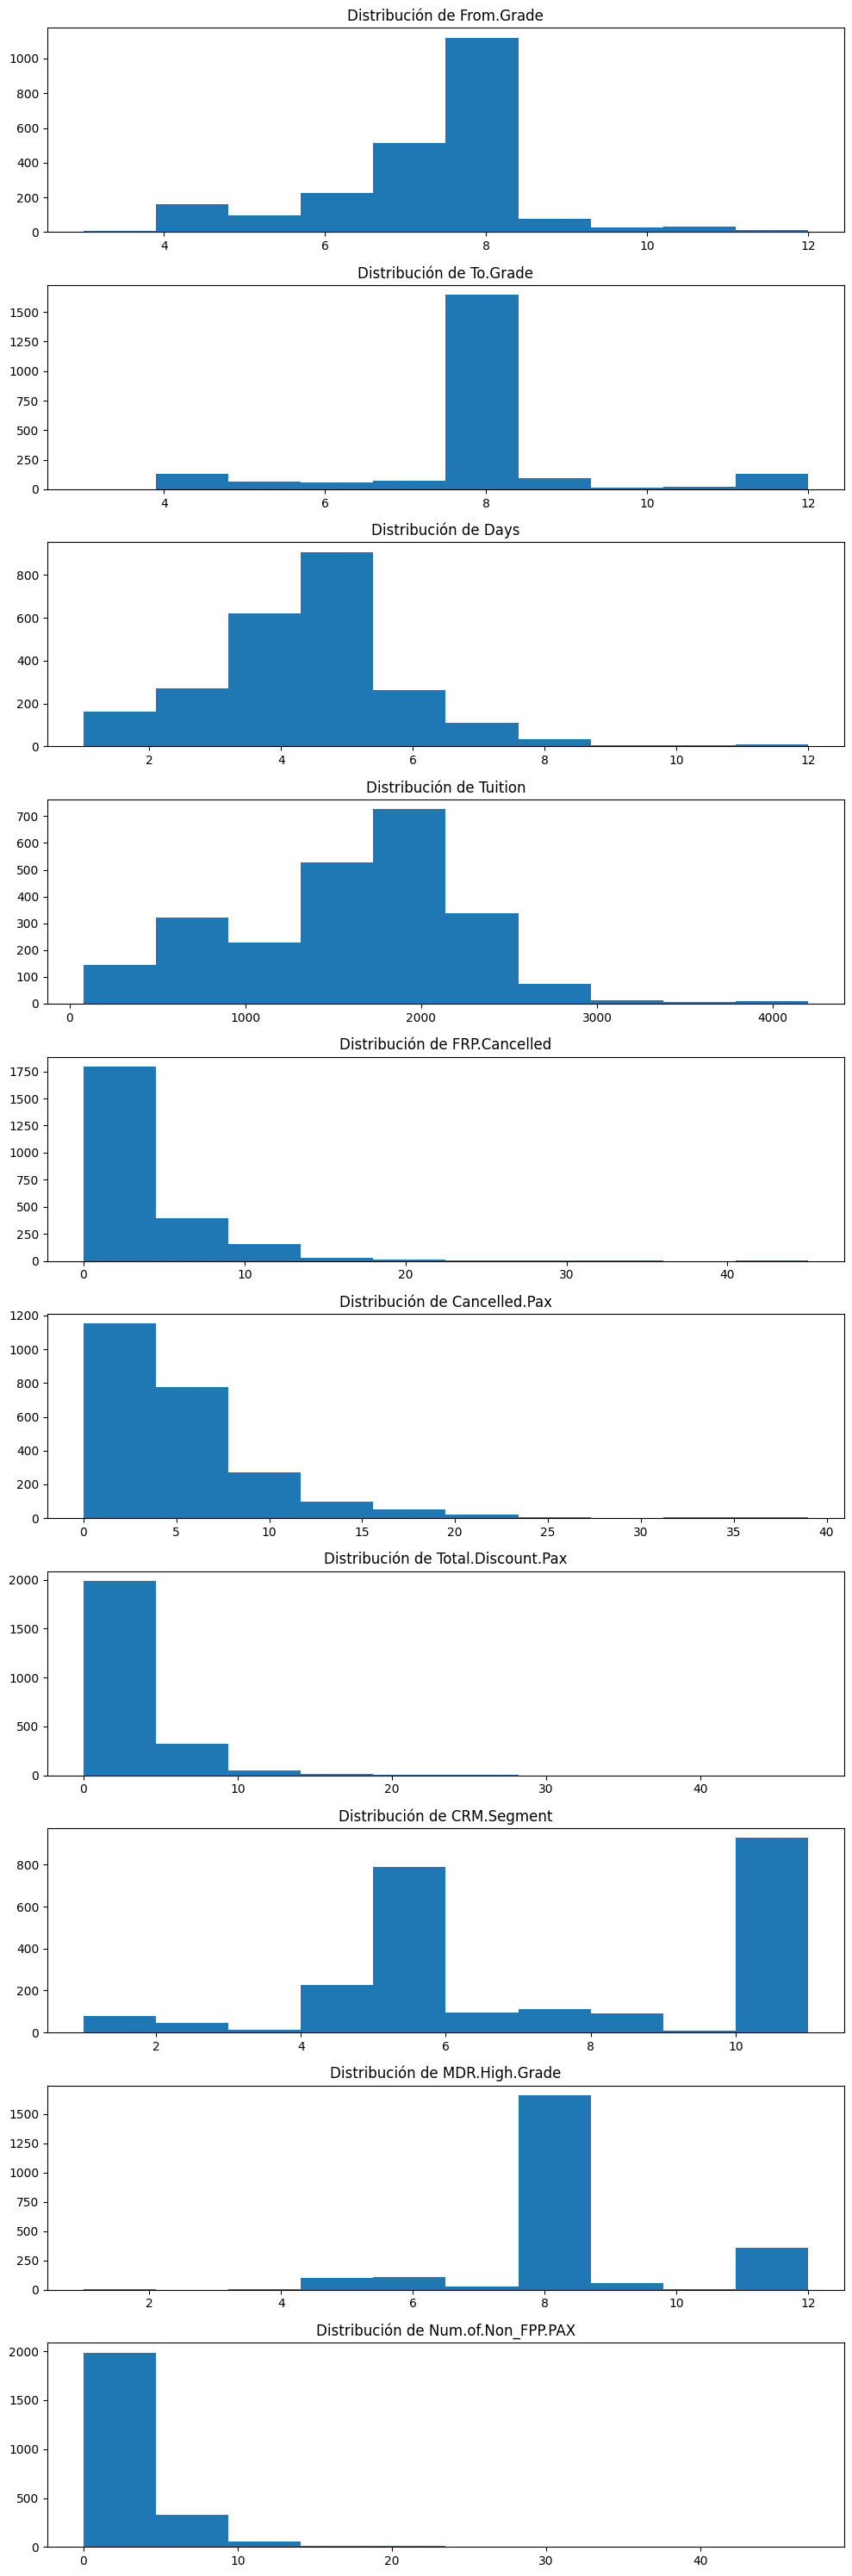

In [592]:
variables_numericas = ['From.Grade', 'To.Grade', 'Days', 'Tuition', 'FRP.Cancelled',
                      'Cancelled.Pax', 'Total.Discount.Pax', 'CRM.Segment', 'MDR.High.Grade',
                       'Num.of.Non_FPP.PAX']

fig, axs = plt.subplots(nrows=len(variables_numericas), figsize=(10, 30))

for i, var in enumerate(variables_numericas):
    axs[i].hist(data81[var])
    axs[i].set_title(f'Distribución de {var}')

plt.tight_layout()
plt.show()

### Estadísticas descriptivas:

#### Resumen estadístico del DataFrame

In [593]:
data81.describe()

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,...,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,2389.000000,2389.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,7.268347,7.912908,0.154039,4.575136,1615.217664,16.867727,3.305567,0.570743,4.807451,2.953537,...,34.250733,1615.217664,1.102135,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,1.388350,1.558226,0.361062,1.432128,645.096047,16.942782,3.677022,0.230666,4.661194,2.876422,...,31.590096,645.096047,0.611544,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,3.000000,3.000000,0.000000,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,79.000000,0.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,7.000000,8.000000,0.000000,4.000000,1174.000000,6.000000,1.000000,0.455000,2.000000,1.000000,...,14.000000,1174.000000,1.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,8.000000,8.000000,0.000000,5.000000,1700.000000,12.000000,2.000000,0.600000,4.000000,2.000000,...,26.000000,1700.000000,1.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,8.000000,8.000000,0.000000,5.000000,2048.000000,23.000000,4.000000,0.727000,6.000000,4.000000,...,44.000000,2048.000000,1.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,12.000000,12.000000,1.000000,12.000000,4200.000000,257.000000,45.000000,1.000000,39.000000,47.000000,...,313.000000,4200.000000,2.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


#### Número de valores distintos en las variables.

In [594]:
unique_counts = data81.nunique().sort_values(ascending=False)
print(unique_counts)


ID                                2390
FPP.to.School.enrollment          1909
Tuition                           1230
SPR.Group.Revenue                 1230
Total.School.Enrollment            893
FRP.Take.up.percent.               476
EZ.Pay.Take.Up.Rate                371
DifferenceTraveltoFirstMeeting     342
FPP.to.PAX                         306
Initial.System.Date                296
DifferenceTraveltoLastMeeting      251
Latest.RPL                         215
FirstMeeting                       207
LastMeeting                        172
Total.Pax                          159
FPP                                146
Departure.Date                     144
Return.Date                        143
Early.RPL                          141
Deposit.Date                       135
FRP.Active                          93
Group.State                         54
Cancelled.Pax                       34
FRP.Cancelled                       29
Program.Code                        28
Total.Discount.Pax       

### Manejo de datos faltantes

#### Variables con valores nulos

In [595]:
null_columns = data81.isnull().any()
null_columns_sorted = null_columns.sort_values(ascending=False)[:56]
print(null_columns_sorted)

ID                                True
Program.Code                      True
EZ.Pay.Take.Up.Rate               True
School.Sponsor                    True
SPR.Product.Type                  True
SPR.New.Existing                  True
FPP                               True
Total.Pax                         True
SPR.Group.Revenue                 True
NumberOfMeetingswithParents       True
FirstMeeting                      True
LastMeeting                       True
DifferenceTraveltoFirstMeeting    True
DifferenceTraveltoLastMeeting     True
SchoolGradeTypeLow                True
SchoolGradeTypeHigh               True
SchoolGradeType                   True
DepartureMonth                    True
GroupGradeTypeLow                 True
GroupGradeTypeHigh                True
GroupGradeType                    True
MajorProgramCode                  True
SingleGradeTripFlag               True
FPP.to.School.enrollment          True
FPP.to.PAX                        True
Num.of.Non_FPP.PAX       

#### Cantidad de valores nulos

In [596]:
data81.isnull().sum()


ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

#### Porcentaje de valores nulos

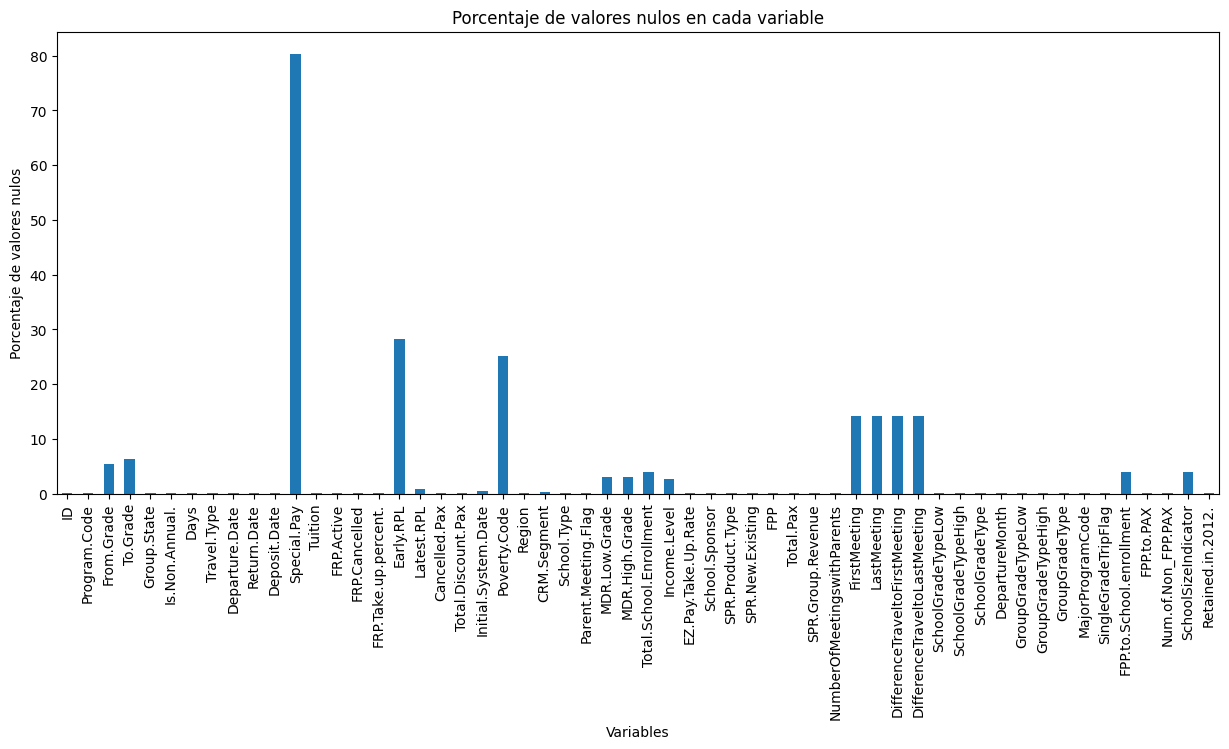

In [597]:
null_percentages = (data81.isnull().sum() / len(data81)) * 100

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 6))

null_percentages.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores nulos')
plt.title('Porcentaje de valores nulos en cada variable')
plt.show()



In [598]:
for var in variables_numericas:
  print("% de valores nulos " + var +": \t "+ "{:,.2f}%".format( data81[var].isnull().sum() / data81.shape[0] *100))

% de valores nulos From.Grade: 	 5.43%
% de valores nulos To.Grade: 	 6.40%
% de valores nulos Days: 	 0.13%
% de valores nulos Tuition: 	 0.13%
% de valores nulos FRP.Cancelled: 	 0.13%
% de valores nulos Cancelled.Pax: 	 0.13%
% de valores nulos Total.Discount.Pax: 	 0.13%
% de valores nulos CRM.Segment: 	 0.29%
% de valores nulos MDR.High.Grade: 	 2.97%
% de valores nulos Num.of.Non_FPP.PAX: 	 0.13%


### Análisis de relaciones

#### Matriz de correlación

In [599]:
data81.corr()  # Matriz de correlación

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,...,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
From.Grade,1.000000,0.779775,-0.107391,0.402515,0.313262,0.094622,0.076536,0.133030,0.062403,0.151813,...,0.042538,0.313262,0.089202,-0.032032,-0.040250,0.196779,-0.062839,-0.122717,0.151813,0.083220
To.Grade,0.779775,1.000000,0.092553,0.440916,0.414692,-0.063830,0.029503,0.154540,0.048955,0.014050,...,-0.128152,0.414692,0.134745,0.046226,0.028065,-0.322935,-0.107073,-0.246170,0.014050,-0.200470
Is.Non.Annual.,-0.107391,0.092553,1.000000,0.019720,0.056052,-0.033359,-0.009289,0.061712,-0.020190,-0.060039,...,-0.072043,0.056052,0.063371,0.111056,0.064330,-0.352164,0.075935,0.020026,-0.060039,-0.390633
Days,0.402515,0.440916,0.019720,1.000000,0.772086,-0.037300,0.058620,0.069282,0.052793,-0.001338,...,-0.107127,0.772086,0.127983,0.088838,0.053798,-0.117656,-0.109527,-0.173382,-0.001338,-0.049402
Tuition,0.313262,0.414692,0.056052,0.772086,1.000000,-0.225533,-0.007369,0.175085,-0.026192,-0.218439,...,-0.356411,1.000000,0.153833,0.130842,0.102268,-0.179277,-0.277246,-0.294471,-0.218439,-0.119015
FRP.Active,0.094622,-0.063830,-0.033359,-0.037300,-0.225533,1.000000,0.463491,0.269307,0.383178,0.698390,...,0.815460,-0.225533,0.000334,-0.120211,-0.105919,0.213394,0.393675,0.261698,0.698390,0.250478
FRP.Cancelled,0.076536,0.029503,-0.009289,0.058620,-0.007369,0.463491,1.000000,0.180026,0.850347,0.323035,...,0.343967,-0.007369,0.107907,0.029818,0.027411,0.059500,0.091254,0.045080,0.323035,0.072659
FRP.Take.up.percent.,0.133030,0.154540,0.061712,0.069282,0.175085,0.269307,0.180026,1.000000,0.054446,-0.095357,...,-0.145122,0.175085,0.142427,0.064169,0.072920,-0.063694,-0.148195,-0.113037,-0.095357,-0.016665
Cancelled.Pax,0.062403,0.048955,-0.020190,0.052793,-0.026192,0.383178,0.850347,0.054446,1.000000,0.349456,...,0.359780,-0.026192,0.090051,0.039739,0.047998,0.021533,0.095976,0.029998,0.349456,0.048998
Total.Discount.Pax,0.151813,0.014050,-0.060039,-0.001338,-0.218439,0.698390,0.323035,-0.095357,0.349456,1.000000,...,0.867006,-0.218439,-0.017774,-0.116298,-0.108579,0.185115,0.422004,-0.030479,1.000000,0.216218


#### Mapa de correlación

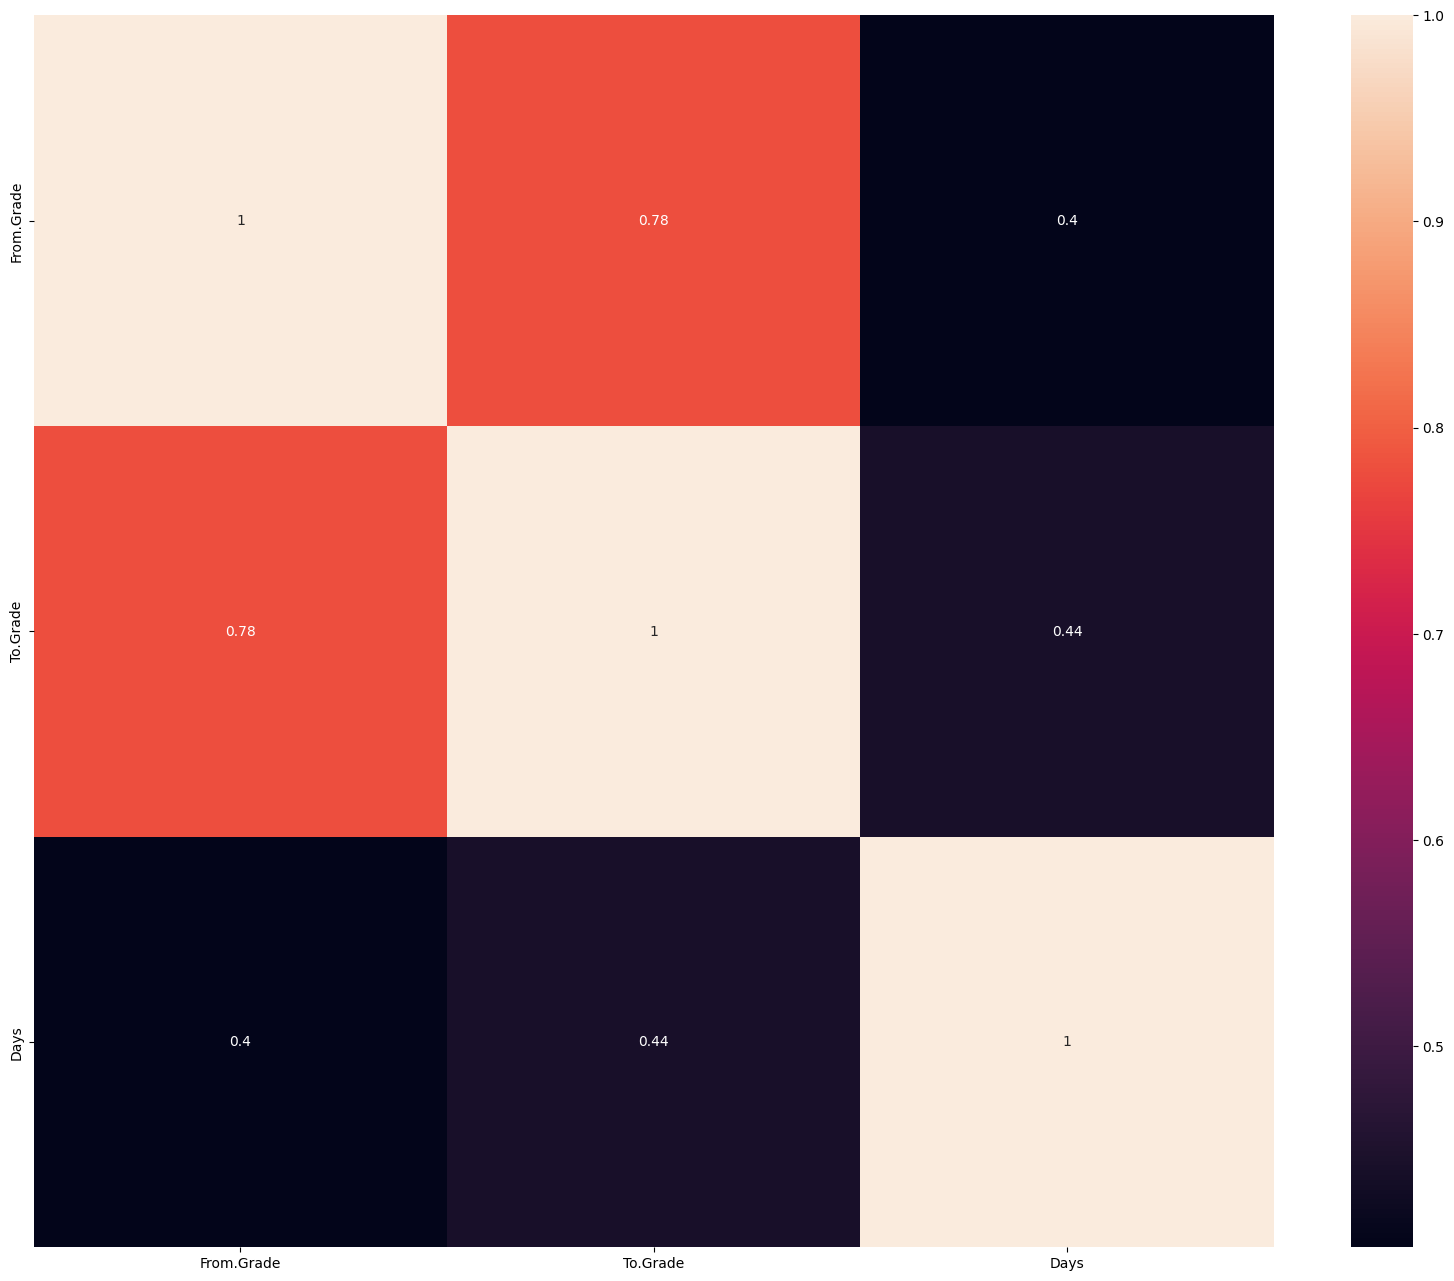

In [600]:
plt.figure(figsize=(20, 16))
sns.heatmap(data_numerical.corr(), fmt='.2g', annot=True)
plt.show()

### Segmentación y agregación

In [601]:
grouped_data = data81.groupby('From.Grade')
grouped_data.mean()  # Calcular la media para cada grupo
grouped_data.describe()  # Obtener estadísticas descriptivas para cada grupo


To.Grade                                                      \
              count       mean       std   min    25%   50%   75%   max   
From.Grade                                                                
3.0             5.0   5.800000  1.923538   3.0   5.00   6.0   7.0   8.0   
4.0           160.0   4.237500  0.598609   4.0   4.00   4.0   4.0   8.0   
5.0            92.0   6.065217  1.389160   5.0   5.00   6.0   6.0  12.0   
6.0           224.0   7.933036  1.041721   6.0   8.00   8.0   8.0  12.0   
7.0           512.0   8.062500  0.740233   7.0   8.00   8.0   8.0  12.0   
8.0          1105.0   8.079638  0.430907   8.0   8.00   8.0   8.0  12.0   
9.0            75.0  11.320000  1.152670   9.0  11.00  12.0  12.0  12.0   
10.0           24.0  11.416667  0.717282  10.0  11.00  12.0  12.0  12.0   
11.0           32.0  11.750000  0.439941  11.0  11.75  12.0  12.0  12.0   
12.0           10.0  12.000000  0.000000  12.0  12.00  12.0  12.0  12.0   

           Is.Non.Annual.            ... Num.of.Non_FPP.PAX        \
                    count      mean  ...                75%   max   
From.Grade                           ...                            
3.0                   5.0  0.600000  ...                2.0   2.0   
4.0                 160.0  0.106250  ...                2.0   7.0   
5.0                  94.0  0.244681  ...                3.0   9.0   
6.0                 226.0  0.252212  ...                2.0   8.0   
7.0                 515.0  0.337864  ...                3.0  19.0   
8.0                1121.0  0.049955  ...                4.0  47.0   
9.0                  75.0  0.186667  ...                2.0  11.0   
10.0                 24.0  0.083333  ...                2.0   5.0   
11.0                 32.0  0.343750  ...                4.0  11.0   
12.0                 10.0  0.100000  ...                2.0   4.0   

           Retained.in.2012.                                                
                       count      mean       std  min  25%  50%   75%  max  
From.Grade                                                                  
3.0                      5.0  0.200000  0.447214  0.0  0.0  0.0  0.00  1.0  
4.0                    160.0  0.700000  0.459696  0.0  0.0  1.0  1.00  1.0  
5.0                     94.0  0.510638  0.502567  0.0  0.0  1.0  1.00  1.0  
6.0                    226.0  0.345133  0.476467  0.0  0.0  0.0  1.00  1.0  
7.0                    515.0  0.401942  0.490767  0.0  0.0  0.0  1.00  1.0  
8.0                   1121.0  0.801070  0.399373  0.0  1.0  1.0  1.00  1.0  
9.0                     75.0  0.213333  0.412420  0.0  0.0  0.0  0.00  1.0  
10.0                    24.0  0.208333  0.414851  0.0  0.0  0.0  0.00  1.0  
11.0                    32.0  0.406250  0.498991  0.0  0.0  0.0  1.00  1.0  
12.0                    10.0  0.300000  0.483046  0.0  0.0  0.0  0.75  1.0  

[10 rows x 208 columns]

### Limpieza

#### Imputar valores faltantes

#### Dropear

In [602]:

data81.drop(['SchoolGradeTypeHigh','SchoolGradeTypeLow'], axis=1, inplace = True)

In [603]:
data81.drop(['GroupGradeTypeLow','GroupGradeTypeHigh'], axis=1, inplace = True)

In [604]:
data81.drop(['LastMeeting','FirstMeeting','Return.Date','Early.RPL'],axis=1,inplace=True)

In [605]:
data81['Time_travel1']= data81['Departure.Date']-data81['Latest.RPL']

In [606]:

data81.isnull().sum().sort_values(ascending=False).sum()

nulls=data81.isnull().sum().sort_values(ascending=False)
nulls[nulls>0]


Special.Pay                       1922
Poverty.Code                       602
DifferenceTraveltoLastMeeting      340
DifferenceTraveltoFirstMeeting     340
To.Grade                           153
From.Grade                         130
SchoolSizeIndicator                 94
FPP.to.School.enrollment            94
Total.School.Enrollment             94
MDR.Low.Grade                       71
MDR.High.Grade                      71
Income.Level                        65
Latest.RPL                          22
Time_travel1                        22
Initial.System.Date                 11
CRM.Segment                          7
FRP.Take.up.percent.                 3
MajorProgramCode                     3
NumberOfMeetingswithParents          3
Travel.Type                          3
Days                                 3
SchoolGradeType                      3
DepartureMonth                       3
GroupGradeType                       3
SingleGradeTripFlag                  3
Total.Pax                

In [607]:
data81['Special.Pay'].unique()

array([nan, 'CP', 'FR', 'SA'], dtype=object)

In [608]:



len(data81.index)-nulls['Special.Pay']

data81.drop('Special.Pay', axis=1, inplace= True)

In [609]:
data81['Poverty.Code'].unique()

array(['B', 'C', nan, 'D', 'A', 'E', 0], dtype=object)

In [610]:
data81.drop('Poverty.Code',axis=1,inplace=True)

In [611]:

finding=data81[data81['NumberOfMeetingswithParents']==0][['NumberOfMeetingswithParents','DifferenceTraveltoLastMeeting','DifferenceTraveltoFirstMeeting']]
finding.head(5)

,NumberOfMeetingswithParents,DifferenceTraveltoLastMeeting,DifferenceTraveltoFirstMeeting
3,0.0,NaN,NaN
31,0.0,NaN,NaN
32,0.0,NaN,NaN
46,0.0,NaN,NaN
50,0.0,NaN,NaN


In [612]:
null=finding.isnull().sum()
null[null>0].sort_index()

data81.drop(['DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting'],axis=1,inplace=True)

In [613]:


IDs = data81[data81['To.Grade'].isnull()].index    #Identificacion de los IDs que tienen este campo vacio
data81.loc[IDs,'To.Grade'] = data81.loc[IDs,'MDR.High.Grade'] #Relleno de la informacion a los IDs Mappeados

In [614]:
print(data81['To.Grade'].isnull().sum(),'NaN en la variable To.Grade')

17 NaN en la variable To.Grade


In [615]:


data81.drop('From.Grade',axis=1 , inplace = True)

In [616]:
data81.dropna(inplace=True)

In [617]:
Columns = data81.columns.to_list()

In [618]:
data81.drop('Program.Code',axis=1,inplace=True) # Existe una variable Mejor
data81.drop('Group.State',axis=1,inplace=True) # Existe una variable Mejor llamada Region y cumple una mejor funcion
data81.drop('Deposit.Date',axis=1,inplace=True) # Correlacion muy baja, no se le encuentra un proposito para predecir, no diferencia en media
data81.drop('FRP.Cancelled',axis=1,inplace=True) # Correlacion muy baja, es muy similar al FRP.Active
data81.drop('FRP.Take.up.percent.',axis=1,inplace=True) # Correlacion muy baja, no tiene mucho sentido
data81.drop('Cancelled.Pax',axis=1,inplace=True) # Correlacion muy baja, no tiene mucho sentido
data81.drop('Initial.System.Date',axis=1,inplace=True) #Initial System no va debido a su baja correlacion y es mas relevante hacer una diferencias con el departure
data81.drop('CRM.Segment',axis=1,inplace=True) #CRM.Segment la retiramos debido a que no hay suficiente informacion y su correlacion es muy baja, ademas se encuentra con mejores variables tales como school type
data81.drop('Parent.Meeting.Flag',axis=1,inplace=True) #Parent meeting flag, se va por que nos quedamos con el numero de sesiones con los padres
data81.drop('MDR.Low.Grade',axis=1,inplace=True)#MDR.LOWGRADE NO ES SIGNIFICATIVA POR CORRELACION, NO OBSERVA UNA BUENA SEGMENTACION Y DEPENDE DE OTRAS VARIABLES PARA LLEGAR A FUNCIONAR
data81.drop('Total.School.Enrollment',axis=1,inplace=True)# Baja correlacion, no hace sentido la distribucion
data81.drop('EZ.Pay.Take.Up.Rate',axis=1,inplace=True) # el pago domiciliado no es un factor relevante que consideremeos
data81.drop('Total.Pax',axis=1,inplace=True)# tiene multicolinealidad con la variabre discount pax y FPP
data81.drop('SPR.Group.Revenue',axis=1,inplace=True)#SPR.Group.Revenue correlacion baja, no da sentido y dificil de explicar
data81.drop('GroupGradeType',axis=1,inplace=True)#correlacion baja
data81.drop('MajorProgramCode',axis=1,inplace=True)#MajorProgramCode correlacion baja, distribucion no se ve razonable
data81.drop('FPP.to.School.enrollment',axis=1,inplace=True)#repetitivo a fpp quitar
data81.drop('FPP.to.PAX',axis=1,inplace=True)#multi
data81.drop('Num.of.Non_FPP.PAX',axis=1,inplace=True)#multi
data81.drop('SchoolSizeIndicator',axis=1,inplace=True)#SchoolSizeIndicator quitar el total school enrollment es mejor
data81.drop('Departure.Date',axis=1,inplace=True)#Se usa mejor time travel, mes o dias
data81.drop('Latest.RPL',axis=1,inplace=True)#Se usa mejor time travel, mes o dias

In [619]:

data81.head()

,ID,To.Grade,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,Total.Discount.Pax,Region,School.Type,...,School.Sponsor,SPR.Product.Type,SPR.New.Existing,FPP,NumberOfMeetingswithParents,SchoolGradeType,DepartureMonth,SingleGradeTripFlag,Retained.in.2012.,Time_travel1
0,1,4.0,0.0,1.0,A,424.0,25.0,4.0,Southern California,PUBLIC,...,1.0,CA History,EXISTING,59.0,1.0,Elementary->Elementary,January,1.0,1.0,155 days
1,2,8.0,0.0,7.0,A,2350.0,9.0,3.0,Other,PUBLIC,...,0.0,East Coast,EXISTING,22.0,2.0,Middle->Middle,January,1.0,1.0,157 days
2,3,8.0,0.0,3.0,A,1181.0,17.0,3.0,Other,PUBLIC,...,0.0,East Coast,EXISTING,24.0,1.0,Middle->Middle,January,1.0,1.0,152 days
4,5,8.0,0.0,6.0,T,865.0,40.0,8.0,Other,PUBLIC,...,0.0,East Coast,EXISTING,81.0,1.0,Middle->Middle,January,0.0,0.0,157 days
5,6,12.0,0.0,4.0,A,2025.0,9.0,1.0,Other,PUBLIC,...,0.0,East Coast,NEW,10.0,1.0,High->High,January,0.0,1.0,103 days


### Instanciar el modelo

In [620]:
X = pd.get_dummies(data81.drop('Retained.in.2012.',axis=1),prefix='Dummie_')

In [621]:
y = data81['Retained.in.2012.']

In [622]:
columns = list(X.columns)
results = pd.DataFrame(columns=['columns', 'accuracy'])

In [623]:
model = LogisticRegression(solver='saga', max_iter=1000)


In [624]:
# Convertir 'Time_travel1' a un número entero que represente la cantidad de días
X['Time_travel1'] = X['Time_travel1'].dt.days

# Ahora puedes intentar entrenar el modelo nuevamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=9000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8307692307692308
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.78       181
         1.0       0.84      0.89      0.86       274

    accuracy                           0.83       455
   macro avg       0.83      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



In [625]:
print(data81.shape)

(2274, 22)


In [626]:
import pandas as pd

# Convertir 'Time_travel1' a un objeto de fecha/hora
X['Time_travel1'] = pd.to_datetime(X['Time_travel1'], format='%Y-%m-%d')

# Calcular la diferencia en días a partir de una fecha de referencia
reference_date = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
X['Time_travel1'] = (X['Time_travel1'] - reference_date).dt.days

# Continuar con el entrenamiento del modelo y el cálculo de la ROC/AUC


In [627]:
from sklearn.metrics import roc_auc_score, roc_curve

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=90000000)
model.fit(X_train, y_train)

# Predecir las etiquetas de salida para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las probabilidades de clase para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Imprimir el área bajo la curva ROC
print("AUC-ROC:", roc_auc)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


AUC-ROC: 0.8910956970601283
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       181
         1.0       0.84      0.88      0.86       274

    accuracy                           0.83       455
   macro avg       0.82      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



AUC-ROC: 0.8910956970601283
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       181
         1.0       0.84      0.88      0.86       274

    accuracy                           0.83       455
   macro avg       0.82      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



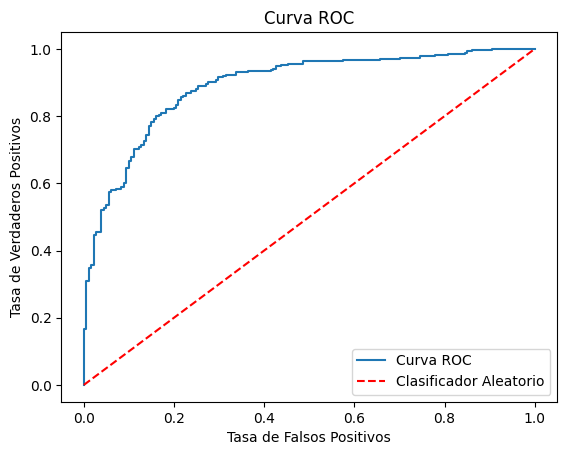

In [628]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=9000000000)
model.fit(X_train, y_train)

# Predecir las etiquetas de salida para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las probabilidades de clase para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Imprimir el área bajo la curva ROC
print("AUC-ROC:", roc_auc)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()



              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       181
         1.0       0.84      0.88      0.86       274

    accuracy                           0.83       455
   macro avg       0.82      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



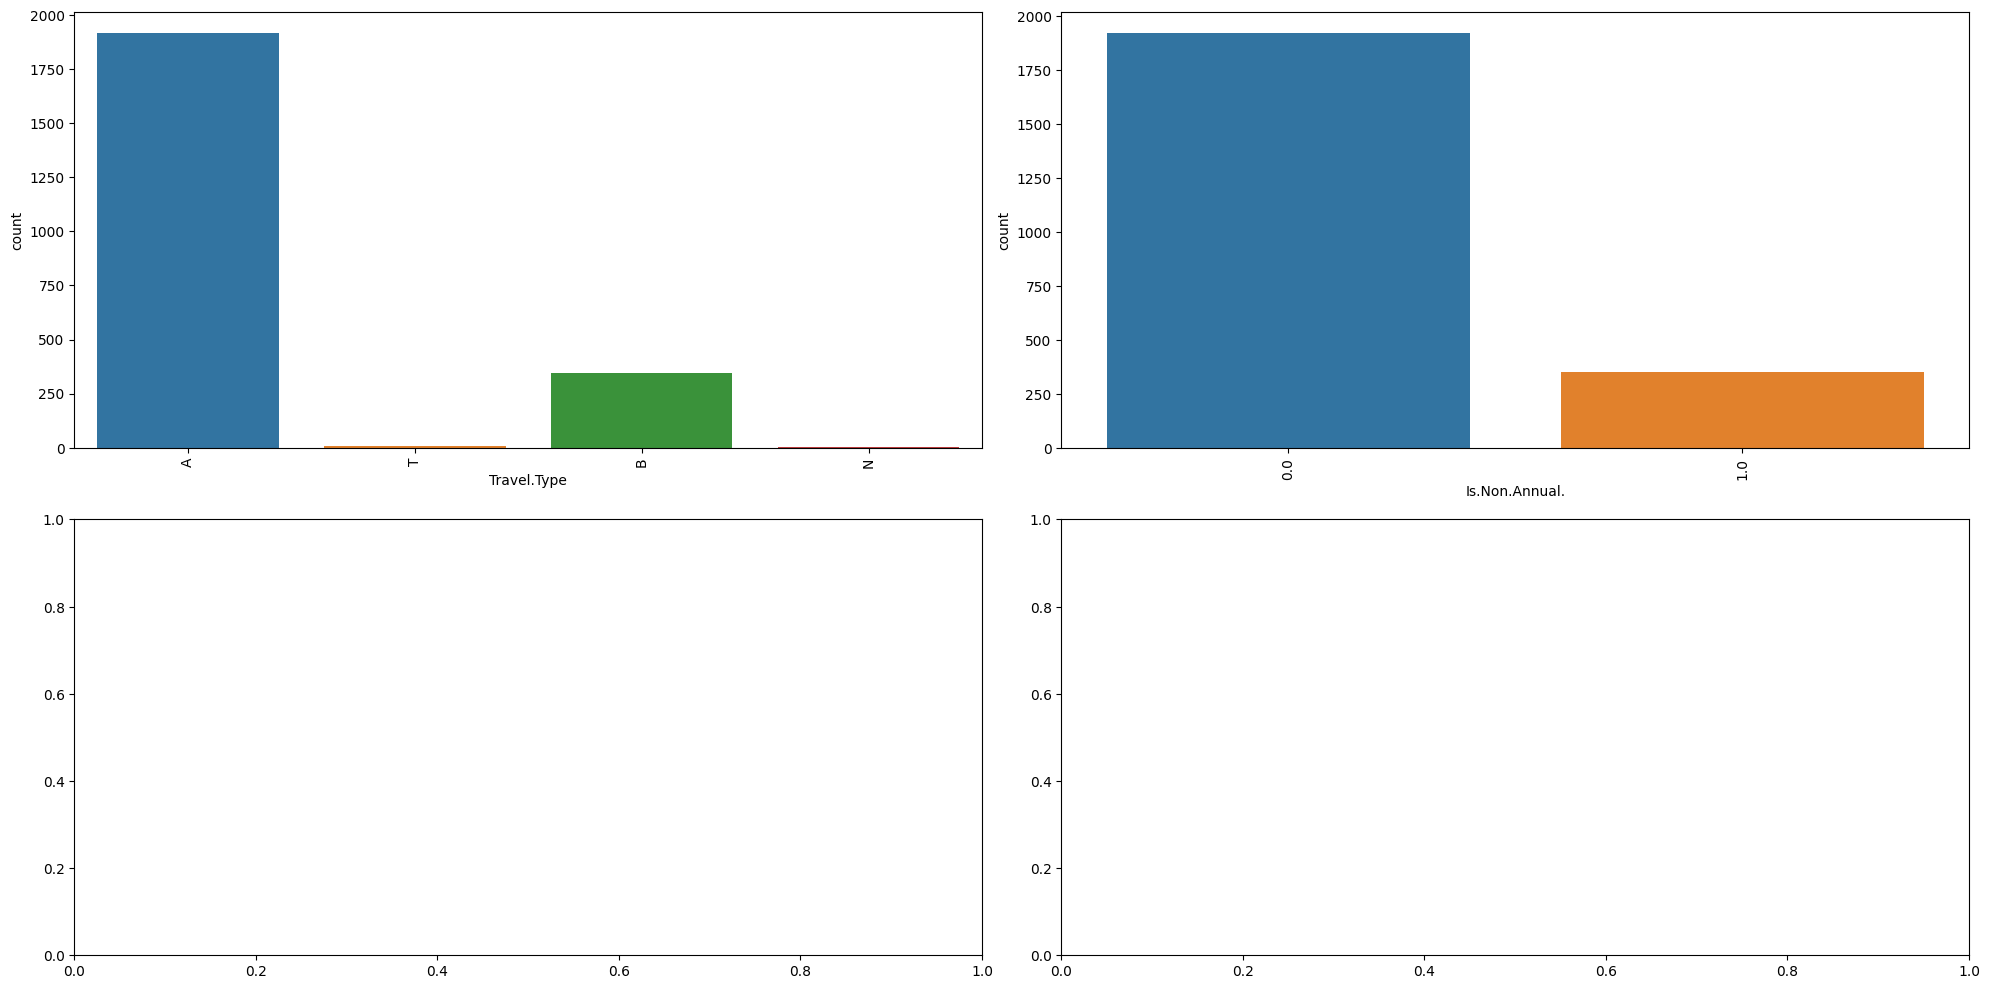

In [629]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

categorical_vars = ['Travel.Type', 'Is.Non.Annual.']
data_categorical = data81[categorical_vars]

# Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Crear un countplot para cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data_categorical, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Mostrar el plot
plt.show()


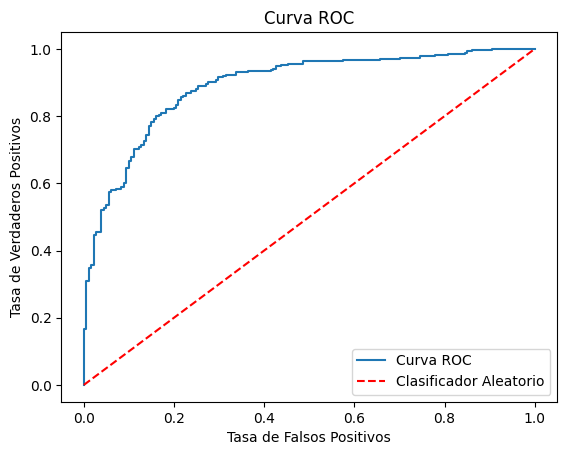

In [630]:
from sklearn.metrics import roc_curve

# Calcular la curva ROC para y_test y y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


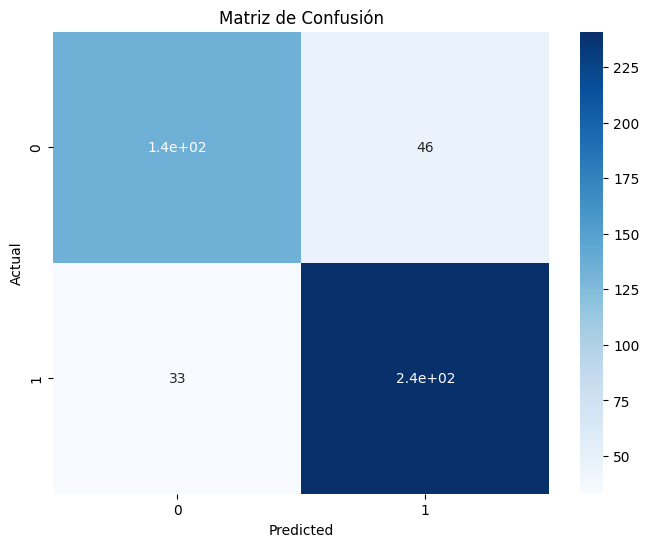

In [631]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión para y_test y y_pred
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


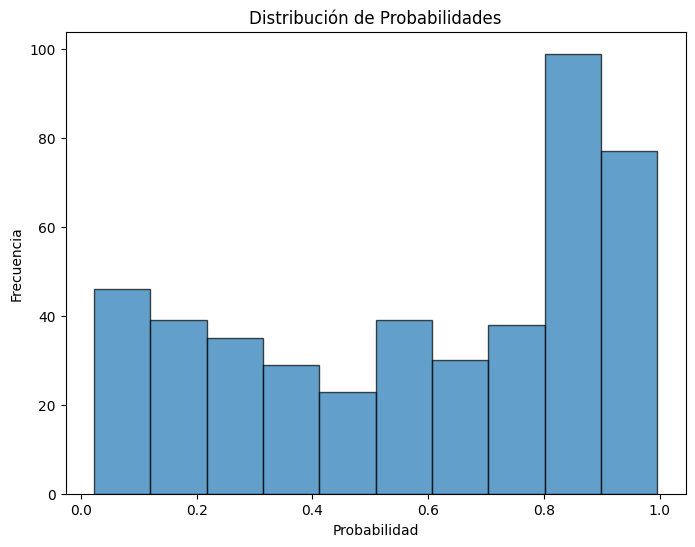

In [632]:
import matplotlib.pyplot as plt

# Crear histograma de las probabilidades
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades')
plt.show()


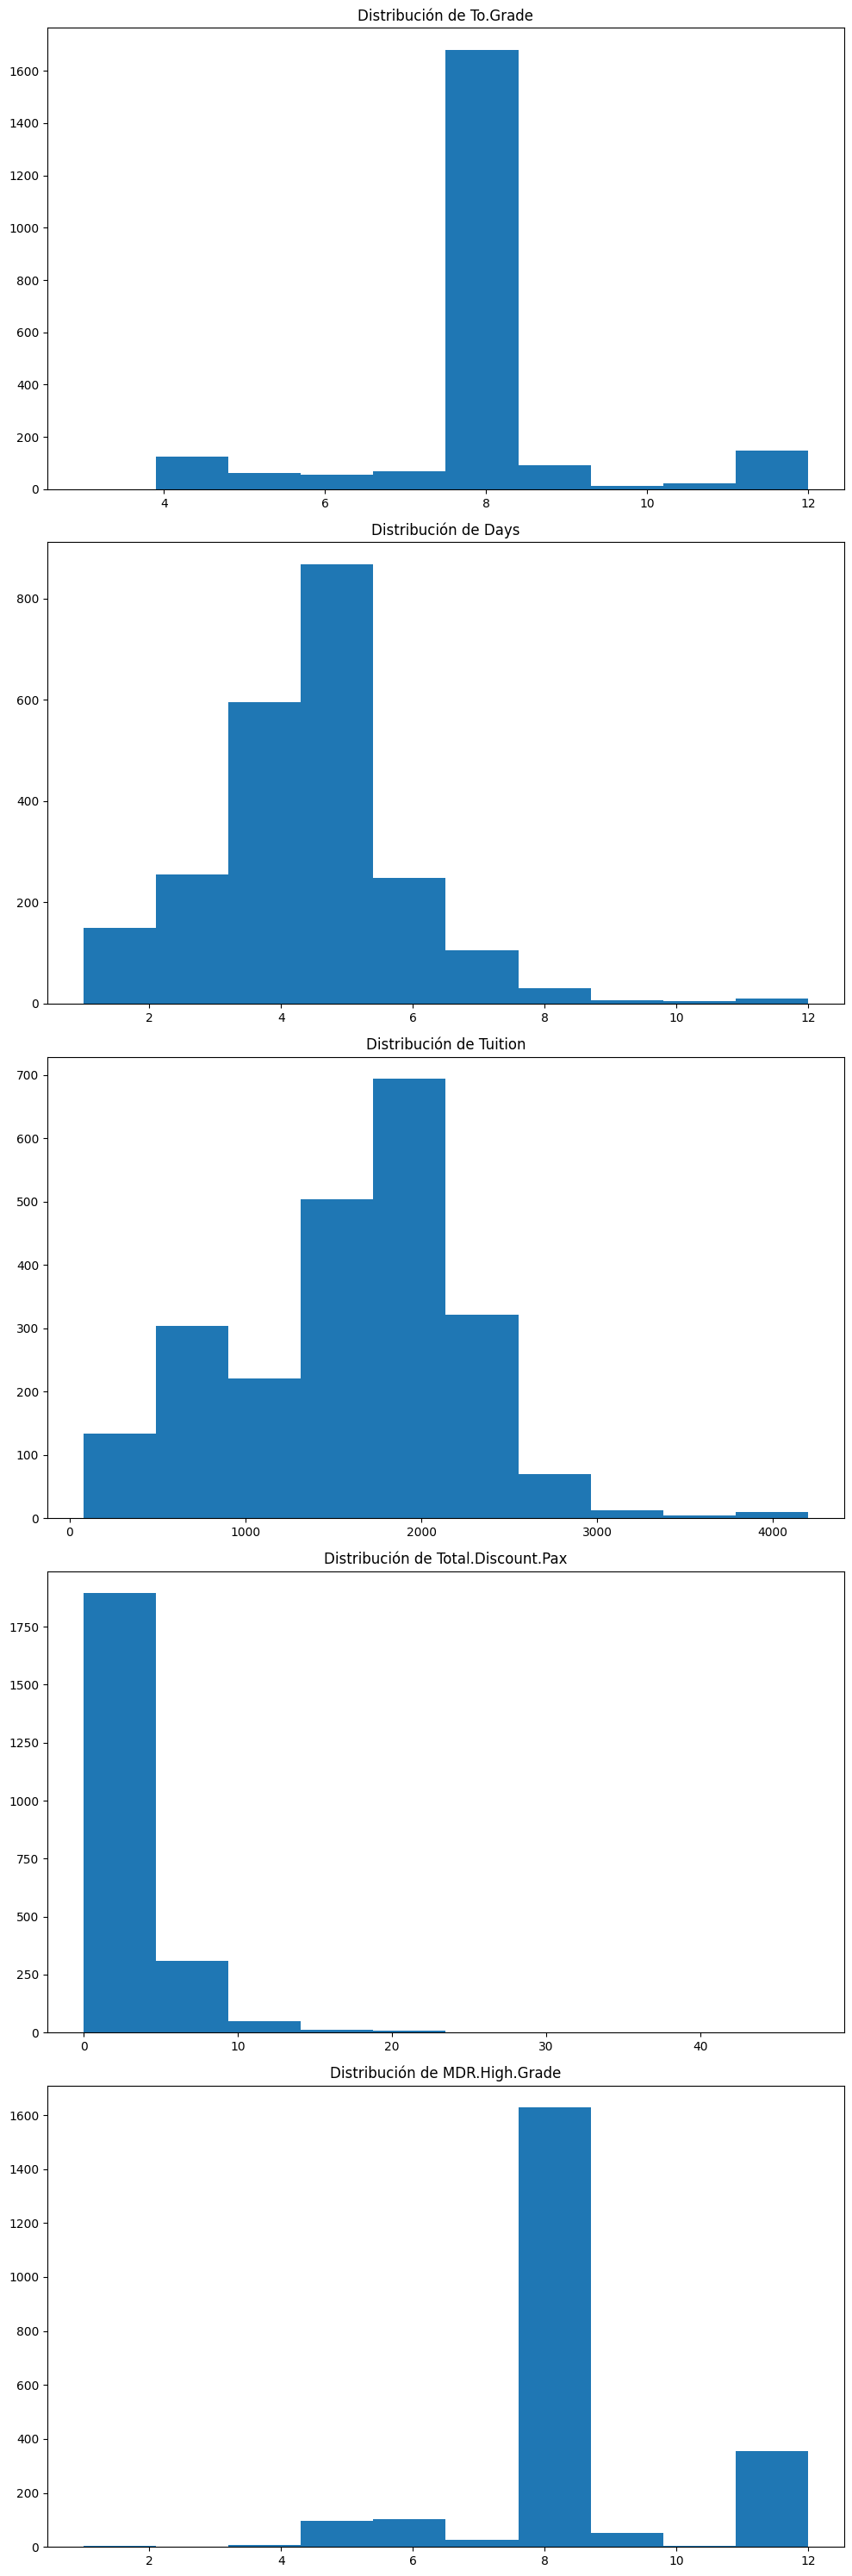

In [633]:
import matplotlib.pyplot as plt

variables_numericas = ['To.Grade', 'Days', 'Tuition',
                       'Total.Discount.Pax', 'MDR.High.Grade',
                      ]

fig, axs = plt.subplots(nrows=len(variables_numericas), figsize=(10, 30))

for i, var in enumerate(variables_numericas):
    axs[i].hist(data81[var])
    axs[i].set_title(f'Distribución de {var}')

plt.tight_layout()
plt.show()


In [634]:
pip install lifetimes


AUC-ROC: 0.8910956970601283
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       181
         1.0       0.84      0.88      0.86       274

    accuracy                           0.83       455
   macro avg       0.82      0.81      0.82       455
weighted avg       0.83      0.83      0.83       455



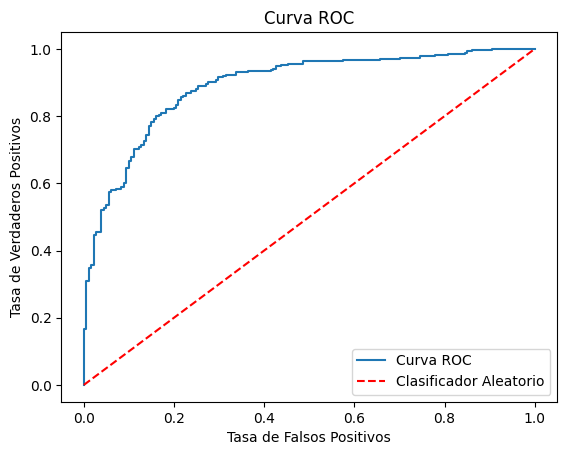

In [635]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=9000000000)
model.fit(X_train, y_train)

# Predecir las etiquetas de salida para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las probabilidades de clase para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Imprimir el área bajo la curva ROC
print("AUC-ROC:", roc_auc)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [636]:
from lifetimes import BetaGeoFitter


In [637]:
print(data81.shape)

(2274, 22)


In [638]:
print(data81.columns)

Index(['ID', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Travel.Type', 'Tuition',
       'FRP.Active', 'Total.Discount.Pax', 'Region', 'School.Type',
       'MDR.High.Grade', 'Income.Level', 'School.Sponsor', 'SPR.Product.Type',
       'SPR.New.Existing', 'FPP', 'NumberOfMeetingswithParents',
       'SchoolGradeType', 'DepartureMonth', 'SingleGradeTripFlag',
       'Retained.in.2012.', 'Time_travel1'],
      dtype='object')


In [639]:
for columna, tipo in data81.dtypes.iteritems():
    print(f" {columna}, {tipo}")


 ID, object
 To.Grade, float64
 Is.Non.Annual., float64
 Days, float64
 Travel.Type, object
 Tuition, float64
 FRP.Active, float64
 Total.Discount.Pax, float64
 Region, object
 School.Type, object
 MDR.High.Grade, float64
 Income.Level, object
 School.Sponsor, float64
 SPR.Product.Type, object
 SPR.New.Existing, object
 FPP, float64
 NumberOfMeetingswithParents, float64
 SchoolGradeType, object
 DepartureMonth, object
 SingleGradeTripFlag, float64
 Retained.in.2012., float64
 Time_travel1, timedelta64[ns]


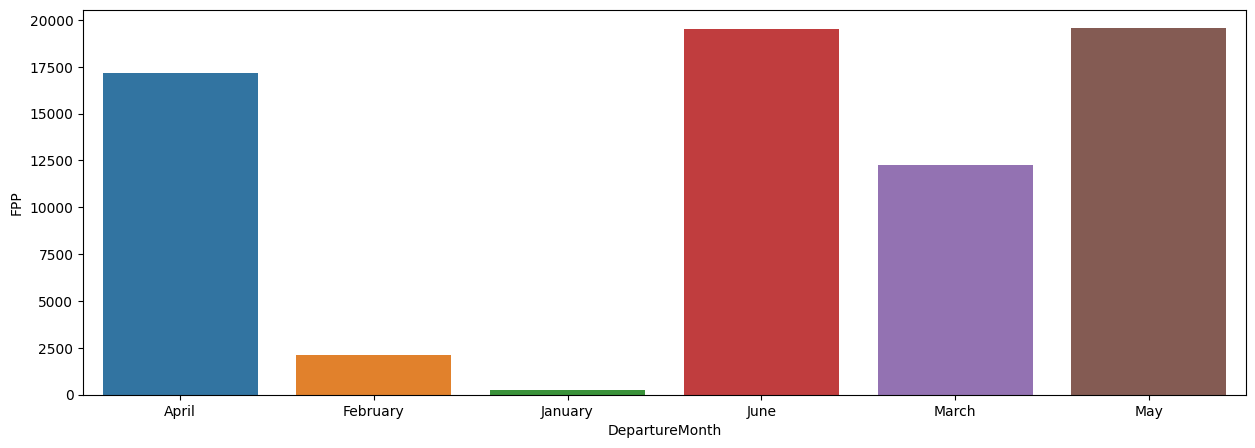

In [640]:
# Viajes por mes
# Los meses con menos pasajeros son en Enero y Febrero
viajes_mensuales = data81.groupby(by="DepartureMonth").sum().reset_index()
plt.figure(figsize=(15,5))

sns.barplot(data=viajes_mensuales, x="DepartureMonth", y="FPP");

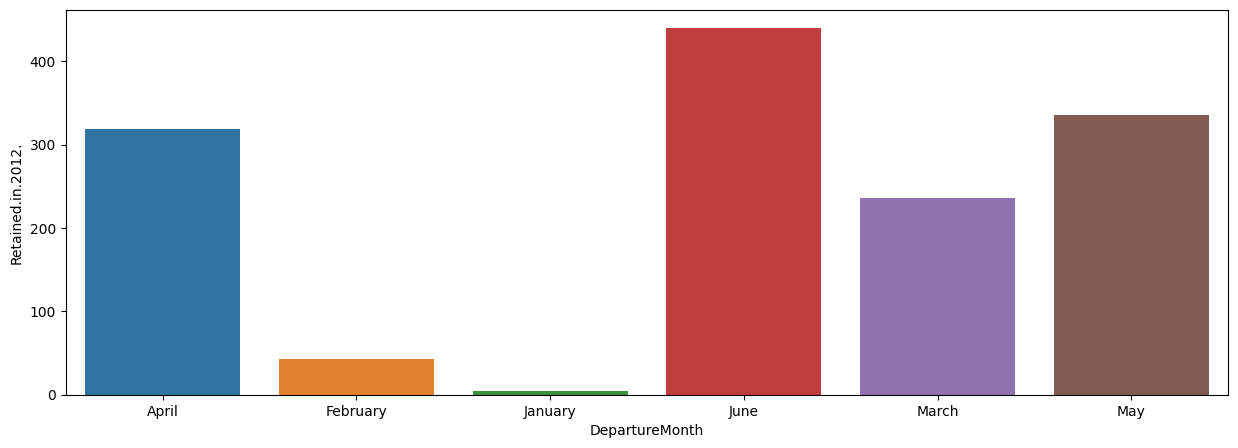

In [641]:
# Los viajes que se realizaron en Junio tuvieron mayor número de retención
plt.figure(figsize=(15,5))
sns.barplot(data=viajes_mensuales, x="DepartureMonth", y="Retained.in.2012.");

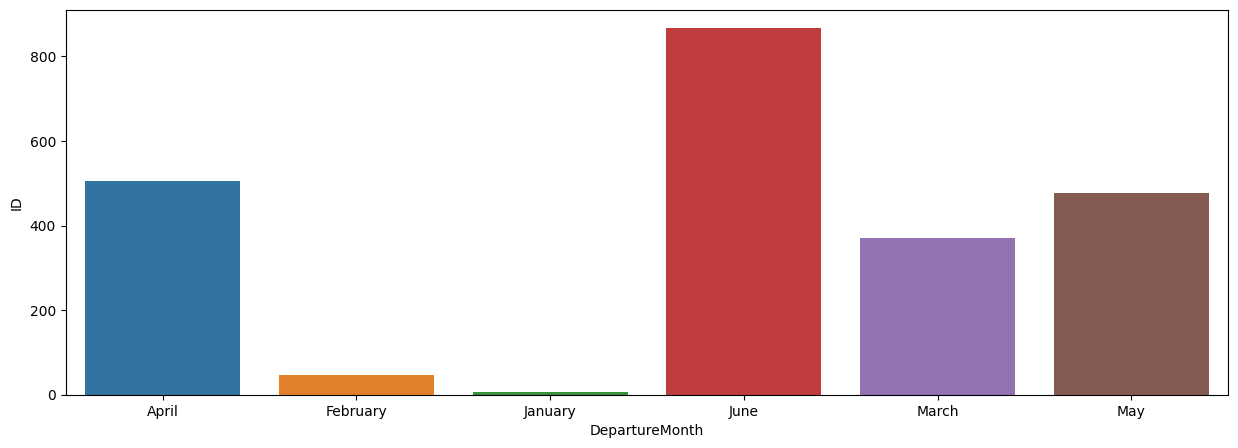

In [642]:
# Viajes por mes
# Junio es el mes con mayor número de viajes programados
viajes_mensuales = data81.groupby(by="DepartureMonth").count().reset_index()
plt.figure(figsize=(15,5))

sns.barplot(data=viajes_mensuales, x="DepartureMonth", y="ID");

# Retention Modeling at Scholastic Travel Company (B)

In [643]:
url83 = 'https://docs.google.com/spreadsheets/d/1XkVsUmjGqfoy0zKG4J_6NZWCbhnRIC5u/export?format=xlsx'
data83 = pd.read_excel(url83, engine='openpyxl')

### Limpieza

In [644]:
data83 = pd.read_excel(url83, sheet_name='Exhibit 1 -- Data', engine='openpyxl')
data83


,ID,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
0,1,10.0,10.0,10.0,10.0,2010-06-06,2010-06-18,2010-08-17,2010-08-30
1,2,9.0,10.0,10.0,NaN,2009-12-15,2010-01-20,2010-05-31,NaT
2,3,NaN,10.0,10.0,NaN,2010-06-09,2010-06-09,2010-10-26,NaT
3,4,10.0,NaN,10.0,NaN,2011-01-06,2011-01-06,NaT,NaT
4,5,10.0,NaN,10.0,NaN,2010-05-13,2010-05-24,2010-05-27,2010-06-01
...,...,...,...,...,...,...,...,...,...
2387,2389,10.0,9.0,8.0,NaN,2010-09-26,2010-10-04,2010-10-08,NaT
2388,2388,5.0,NaN,NaN,NaN,2010-09-27,2010-12-17,NaT,NaT
2389,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
2390,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT


In [645]:
data83 = data83.dropna()


### Exploracion

In [646]:
# Calcular la media y la desviación estándar de NPS para cada año
for year in ['NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008']:
    print(f"Media de {year}: {data83[year].mean()}")
    print(f"Desviación estándar de {year}: {data83[year].std()}")

Media de NPS 2011: 9.546125461254613
Desviación estándar de NPS 2011: 1.0906563293015907
Media de NPS 2010: 9.542435424354244
Desviación estándar de NPS 2010: 0.814821026974468
Media de NPS 2009: 9.468634686346864
Desviación estándar de NPS 2009: 0.8377292827858207
Media de NPS 2008: 9.420664206642066
Desviación estándar de NPS 2008: 0.9190258136115986


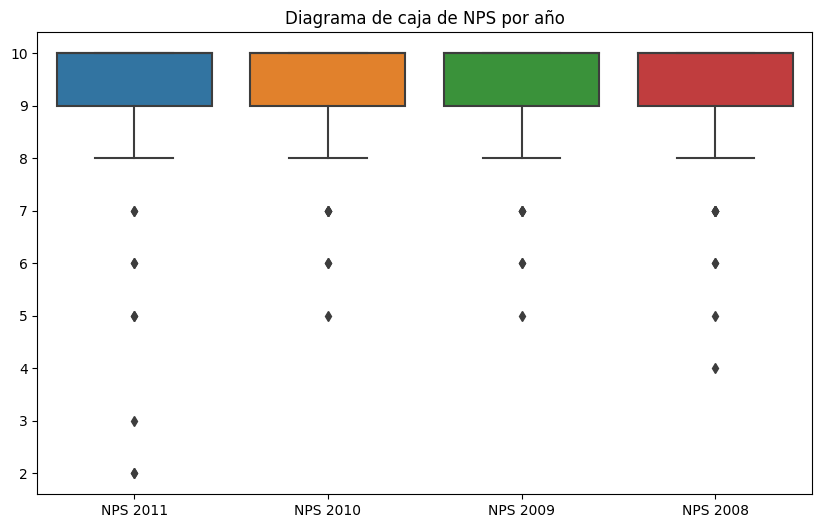

In [647]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data83[['NPS 2011', 'NPS 2010', 'NPS 2009', 'NPS 2008']])
plt.title('Diagrama de caja de NPS por año')
plt.show()

### Algoritmo de regresión logística

In [648]:
# Vamos a predecir 'NPS 2011'
X = data83.drop(columns=['NPS 2011', 'ID'])  # Eliminamos la columna objetivo y 'ID'
y = data83['NPS 2011']  # 'NPS 2011' es nuestro objetivo

# Ahora, puedes dividir tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [649]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las variables de entrada
y = data83['NPS 2011']
X = data83.drop(columns=['NPS 2011', 'ID'])  # Elimina las columnas 'NPS 2011' y 'ID' del dataframe.

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Puedes cambiar el random_state y test_size según tus necesidades.

# No necesitamos eliminar ninguna columna de X_train o X_test porque ya eliminamos 'ID' antes de la división.

In [650]:
# Asumo que quieres eliminar las columnas de fechas
X_train = X_train.drop(columns=['>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date'])
X_test = X_test.drop(columns=['>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date'])

In [651]:
# Definir la variable objetivo y las variables de entrada
y = data83['NPS 2011']
X = data83.drop(columns=['NPS 2011', 'ID'])  # Elimina las columnas 'NPS 2011' y 'ID' del dataframe.

# Convierte las columnas de tiempo a segundos desde una fecha de referencia
for col in ['>= 3 FPP Date', '>= 10 FPP Date', '>= 20 FPP Date', '>= 35 FPP Date']:
    X[col] = (X[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [652]:
# Dividimos nuestros datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos una instancia del modelo y ajustamos los datos
model = LogisticRegression(solver='liblinear') # liblinear es bueno para conjuntos de datos pequeños
model.fit(X_train, y_train)

# Hacemos predicciones con nuestro conjunto de prueba
predictions = model.predict(X_test)

# Evaluamos el rendimiento del modelo
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

Accuracy: 0.8181818181818182
